In [30]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

# Irradiance Trace Visualization

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Dec 29 12:26:39 2020', '__version__': '1.0', '__globals__': [], 'Gmonth': array([[0.00000000e+00, 0.00000000e+00],
       [9.00000000e+02, 6.76852745e+01],
       [1.80000000e+03, 7.77214440e+01],
       ...,
       [7.73460000e+06, 0.00000000e+00],
       [7.73550000e+06, 0.00000000e+00],
       [7.73640000e+06, 0.00000000e+00]])}
Shape: (4770, 2)
Timestamp:
[0.0000e+00 9.0000e+02 1.8000e+03 ... 7.7346e+06 7.7355e+06 7.7364e+06]
Irradiance:
[ 0.         67.68527452 77.72144401 ...  0.          0.
  0.        ]


Text(0, 0.5, 'Irradiance [W/m²]')

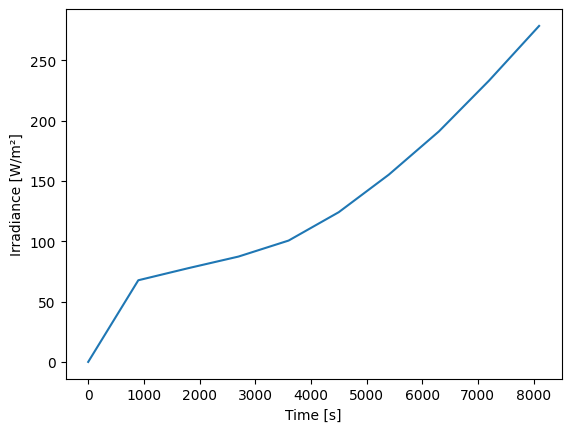

In [36]:
# Load the .mat file
mat_file = scipy.io.loadmat('gmonths.mat')

# Display the contents of the .mat file
print(mat_file)  # -> dict
print(f"Shape: {mat_file['Gmonth'].shape}")
timestamp = mat_file['Gmonth'][:, 0]  # [s]
irradiance = mat_file['Gmonth'][:, 1]  # [W/m^2]
print(f"Timestamp:\n{timestamp}")
print(f"Irradiance:\n{irradiance}")

# Plot
interval = 10
fig, ax = plt.subplots()
ax.plot(timestamp[:interval], irradiance[:interval])
# ax.plot(timestamp, irradiance)

# Add labels to the axis
ax.set_xlabel('Time [s]')
ax.set_ylabel('Irradiance [W/m²]')

In [ ]:
# Display the first six days
BEGIN, END = 0, int(6 * 86_400 / 900)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot main data
ax.plot(timestamp[BEGIN:END], irradiance[BEGIN:END], 
        label='Irradiance', 
        color='#2E86C1', 
        linewidth=2)

# Add colored backgrounds and labels for each day
colors = ['#FFF3E0', '#E3F2FD', '#E8F5E9', '#FCE4EC', '#EDE7F6']
seconds_per_day = 86_400

for day in range(((END * 900) // seconds_per_day) + 1):
    day_start = day * seconds_per_day
    day_end = (day + 1) * seconds_per_day
    
    # Add colored background
    ax.axvspan(day_start, day_end, 
               color=colors[day % len(colors)], 
               alpha=0.5,
               label=f'Day {day+1}')
    
    # Add day label
    ax.text((day_start + day_end)/2, ax.get_ylim()[1]*0.95,
            f'Day {day+1}',
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=10,
            fontweight='bold')

# Customize appearance
ax.set_xlabel('Time [s]', fontsize=12, fontweight='bold')
ax.set_ylabel('Irradiance [W/m²]', fontsize=12, fontweight='bold')
ax.set_title('Solar Irradiance Over Time', fontsize=14, pad=15, fontweight='bold')

# Add grid and legend
ax.grid(True, which='major', linestyle='--', alpha=0.7)

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlim(0, 600_000)

plt.tight_layout()
plt.show()

# PV Panel Datasheet Digitalization

![](datasheet/PVcell/datasheet.bmp)

The [plotdigitizer](https://plotdigitizer.com/app) is easy to use and suggested. Any other software can be used to digitize the datasheet.

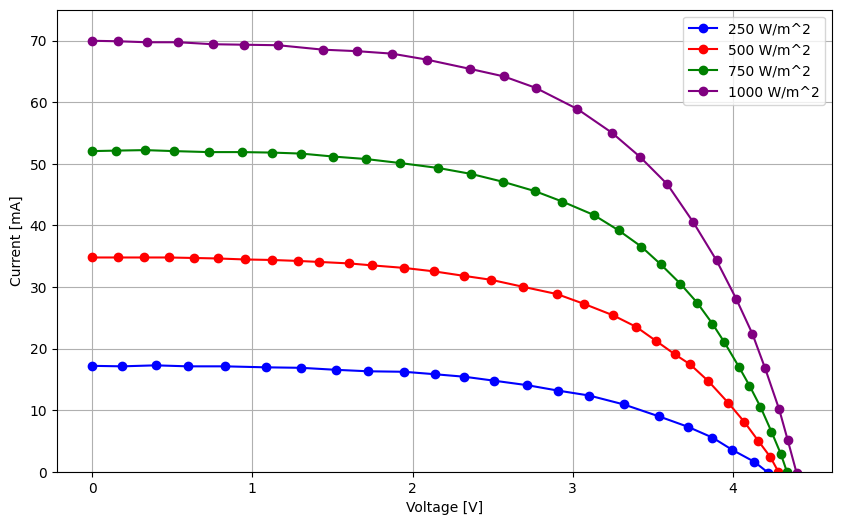

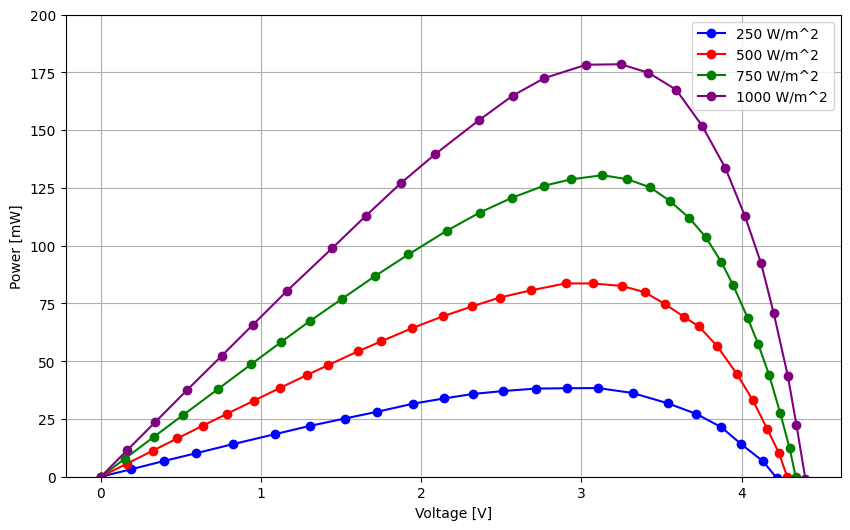

Voltage at MPP for 1000 W/m^2: 3.2453023559732936 V
Current at MPP for 1000 W/m^2: 55.02007335305228 mA
Voltage at MPP for 750 W/m^2: 3.1310310935783328 V
Current at MPP for 750 W/m^2: 41.68674406421775 mA
Voltage at MPP for 500 W/m^2: 2.902488568788411 V
Current at MPP for 500 W/m^2: 28.835339050839046 mA
Voltage at MPP for 250 W/m^2: 3.1030980416060467 V
Current at MPP for 250 W/m^2: 12.369468604426473 mA


'\nVoltage at MPP for 1000 W/m^2: 3.2453023559732936 V\nCurrent at MPP for 1000 W/m^2: 55.02007335305228 mA\nVoltage at MPP for 750 W/m^2: 3.1310310935783328 V\nCurrent at MPP for 750 W/m^2: 41.68674406421775 mA\nVoltage at MPP for 500 W/m^2: 2.902488568788411 V\nCurrent at MPP for 500 W/m^2: 28.835339050839046 mA\nVoltage at MPP for 250 W/m^2: 3.1030980416060467 V\nCurrent at MPP for 250 W/m^2: 12.369468604426473 mA\n'

In [92]:
# Extract digitalized curve points
trace_1000 = np.loadtxt('datasheet/PVcell/trace_1000.txt', delimiter=',', skiprows=1)
trace_750 = np.loadtxt('datasheet/PVcell/trace_750.txt', delimiter=',', skiprows=1)
trace_500 = np.loadtxt('datasheet/PVcell/trace_500.txt', delimiter=',', skiprows=1)
trace_250 = np.loadtxt('datasheet/PVcell/trace_250.txt', delimiter=',', skiprows=1)


# Extract columns
voltage_1000 = trace_1000[:, 0]
current_1000 = trace_1000[:, 1]
voltage_750 = trace_750[:, 0]
current_750 = trace_750[:, 1]
voltage_500 = trace_500[:, 0]
current_500 = trace_500[:, 1]
voltage_250 = trace_250[:, 0]
current_250 = trace_250[:, 1]


# Plot
plt.figure(figsize=(10, 6))
plt.plot(voltage_250, current_250, 'o-', label='250 W/m^2', color='blue')
plt.plot(voltage_500, current_500, 'o-', label='500 W/m^2', color = 'red') 
plt.plot(voltage_750, current_750, 'o-', label='750 W/m^2', color = 'green')
plt.plot(voltage_1000, current_1000, 'o-', label='1000 W/m^2', color='purple')
plt.xlabel('Voltage [V]')
plt.ylabel('Current [mA]')
plt.ylim(0, 75)
plt.legend()
plt.grid(True)
plt.show()

# Plot power curves
power_1000 = voltage_1000 * current_1000
power_750 = voltage_750 * current_750
power_500 = voltage_500 * current_500
power_250 = voltage_250 * current_250

# Plot
plt.figure(figsize=(10, 6))
plt.plot(voltage_250, power_250, 'o-', label='250 W/m^2', color='blue')
plt.plot(voltage_500, power_500, 'o-', label='500 W/m^2', color = 'red') 
plt.plot(voltage_750, power_750, 'o-', label='750 W/m^2', color = 'green')
plt.plot(voltage_1000, power_1000, 'o-', label='1000 W/m^2', color='purple')
plt.xlabel('Voltage [V]')
plt.ylabel('Power [mW]')
plt.ylim(0, 200)
plt.legend()
plt.grid(True)
plt.show()

# Extract MPP for each curve
voltage_mpp_1000 = voltage_1000[np.argmax(power_1000)]
voltage_mpp_750 = voltage_750[np.argmax(power_750)]
voltage_mpp_500 = voltage_500[np.argmax(power_500)]
voltage_mpp_250 = voltage_250[np.argmax(power_250)]

current_mpp_1000 = current_1000[np.where(voltage_1000 == voltage_mpp_1000)][0]
current_mpp_750 = current_750[np.where(voltage_750 == voltage_mpp_750)][0]
current_mpp_500 = current_500[np.where(voltage_500 == voltage_mpp_500)][0]
current_mpp_250 = current_250[np.where(voltage_250 == voltage_mpp_250)][0]

print(f'Voltage at MPP for 1000 W/m^2: {voltage_mpp_1000} V')
print(f'Current at MPP for 1000 W/m^2: {current_mpp_1000} mA')
print(f'Voltage at MPP for 750 W/m^2: {voltage_mpp_750} V')
print(f'Current at MPP for 750 W/m^2: {current_mpp_750} mA')
print(f'Voltage at MPP for 500 W/m^2: {voltage_mpp_500} V')
print(f'Current at MPP for 500 W/m^2: {current_mpp_500} mA')
print(f'Voltage at MPP for 250 W/m^2: {voltage_mpp_250} V')
print(f'Current at MPP for 250 W/m^2: {current_mpp_250} mA')

"""
Voltage at MPP for 1000 W/m^2: 3.2453023559732936 V
Current at MPP for 1000 W/m^2: 55.02007335305228 mA
Voltage at MPP for 750 W/m^2: 3.1310310935783328 V
Current at MPP for 750 W/m^2: 41.68674406421775 mA
Voltage at MPP for 500 W/m^2: 2.902488568788411 V
Current at MPP for 500 W/m^2: 28.835339050839046 mA
Voltage at MPP for 250 W/m^2: 3.1030980416060467 V
Current at MPP for 250 W/m^2: 12.369468604426473 mA
"""



# DC-DC Converter Datasheet Digitalization

![](datasheet/PV_DCDCconv/efficiency.jpeg)

C:\Users\Diego\AppData\Local\Temp\ipykernel_8172\3163533104.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


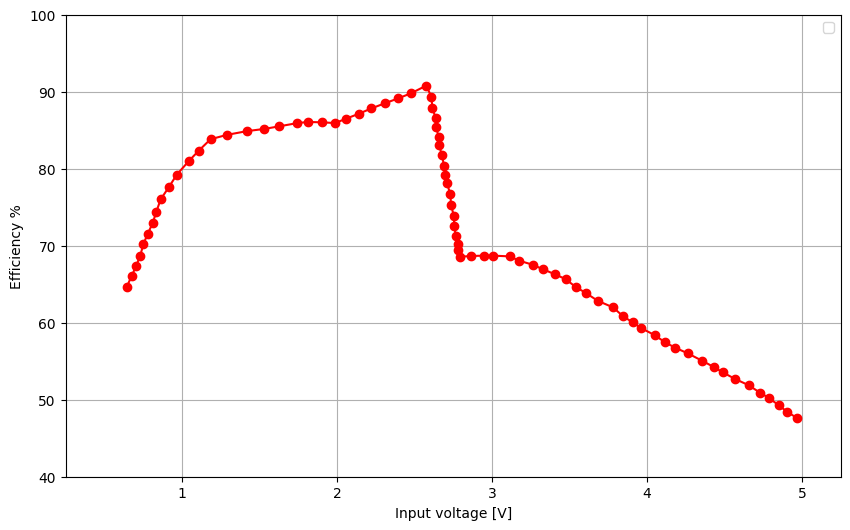

Input voltage: 0.6437947522715187, 0.6756157189097678, 0.7034606420363885, 0.731303762513691, 0.7511923924353147, 0.7790373155619348, 0.8108582822001844, 0.8347253591658592, 0.8625696814093735, 0.9182577250132979, 0.96599007629533, 1.0455439950987169, 1.1091883319076383, 1.1847644045500796, 1.2921638473631931, 1.4194501174486114, 1.5308274064226715, 1.6262927098698419, 1.745624489399581, 1.8132448697201307, 1.904733528772566, 1.9882646928537935, 2.059864721984607, 2.1394192416710993, 2.222950405752327, 2.310461218643817, 2.3939935844912545, 2.477525349455588, 2.5769678981805977, 2.6087906674681647, 2.6167451580238446, 2.636633787945468, 2.640611634106414, 2.656522417867091, 2.6605002640280375, 2.6764110477887146, 2.692322432432497, 2.700277523871282, 2.7082338170762807, 2.732099692275744, 2.736076937553583, 2.7559655674752066, 2.7559655674752066, 2.7678997068411504, 2.7838104906018275, 2.7838104906018275, 2.7917655820406138, 2.8673422555661596, 2.9468973761357584, 3.006563265900628, 3.

In [ ]:
# PV Panel Converter

# Extract digitalized curve points
trace_PV_DCDCconv = np.loadtxt('datasheet/PV_DCDCconv/trace_PV_DCDCconverter.txt', delimiter=',', skiprows=1)

# Extract columns
input_voltage = trace_PV_DCDCconv[:, 0]
eta = trace_PV_DCDCconv[:, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(input_voltage, eta, 'o-', color='red')
plt.xlabel('Input voltage [V]')
plt.ylabel('Efficiency %')
plt.xlim(0.25, 5.25)
plt.ylim(40, 100)

plt.legend()
plt.grid(True)
plt.show()

print(f"Input voltage: {', '.join(map(str, input_voltage))}")
print(f"Efficiency: {', '.join(map(str, eta))}")

# Input voltage: 0.6437947522715187, 0.6756157189097678, 0.7034606420363885, 0.731303762513691, 0.7511923924353147, 0.7790373155619348, 0.8108582822001844, 0.8347253591658592, 0.8625696814093735, 0.9182577250132979, 0.96599007629533, 1.0455439950987169, 1.1091883319076383, 1.1847644045500796, 1.2921638473631931, 1.4194501174486114, 1.5308274064226715, 1.6262927098698419, 1.745624489399581, 1.8132448697201307, 1.904733528772566, 1.9882646928537935, 2.059864721984607, 2.1394192416710993, 2.222950405752327, 2.310461218643817, 2.3939935844912545, 2.477525349455588, 2.5769678981805977, 2.6087906674681647, 2.6167451580238446, 2.636633787945468, 2.640611634106414, 2.656522417867091, 2.6605002640280375, 2.6764110477887146, 2.692322432432497, 2.700277523871282, 2.7082338170762807, 2.732099692275744, 2.736076937553583, 2.7559655674752066, 2.7559655674752066, 2.7678997068411504, 2.7838104906018275, 2.7838104906018275, 2.7917655820406138, 2.8673422555661596, 2.9468973761357584, 3.006563265900628, 3.113960906064424, 3.17760464199024, 3.265114253115519, 3.328757989041334, 3.4083125087278274, 3.4759346916976943, 3.5395772258572977, 3.607198807944059, 3.6827754814696063, 3.782218631077722, 3.845862367003538, 3.9095067038124585, 3.9612163003723313, 4.052703757658556, 4.116347493584371, 4.183969676554238, 4.263523595357626, 4.3550110526438495, 4.430587726169397, 4.490253615934266, 4.569808135620759, 4.657317746746038, 4.728917174993745, 4.7885830647586145, 4.852227401567537, 4.903936998127408, 4.967580133170117
# Efficiency: 64.65819048159698, 66.04133389815483, 67.32909208866944, 68.71223910766048, 70.19077855756113, 71.52622936109736, 72.9093799825216, 74.38791943242224, 76.00953672138772, 77.67885382824122, 79.20508589116346, 81.01748804194818, 82.3529388454844, 83.83148189781824, 84.40381847110994, 84.88076621592522, 85.16692909892129, 85.50079540223854, 85.9300505340322, 86.07313197553023, 86.02543576007542, 85.9300505340322, 86.5023835048907, 87.1224180948538, 87.83783971207671, 88.50556331262825, 89.12559790259135, 89.79332150314286, 90.79491140701163, 89.36407177499899, 87.83783971207671, 86.59777233336712, 85.40540297132893, 84.06995216779269, 83.02066784968571, 81.78060227219271, 80.34975903774686, 79.15738967570866, 78.10810535760169, 76.77265815649864, 75.24642249114319, 73.81558285913053, 72.57551367920433, 71.28775548868973, 70.19077855756113, 69.42766072488341, 68.56915406372926, 68.66454649463887, 68.71223910766048, 68.71223910766048, 68.61685388161726, 68.04451730832557, 67.51986974562229, 66.94753317233058, 66.27980777056247, 65.65977498181596, 64.65819048159698, 63.847376433464454, 62.84578472837909, 61.987278067224935, 60.84260492064154, 60.0317944749422, 59.31637285771929, 58.362484572955104, 57.45627809391297, 56.74085647669004, 56.025431257033944, 55.071542972269754, 54.260728924137226, 53.5453073069143, 52.68680424819335, 51.87599020006082, 50.92209471043026, 50.20667309320734, 49.252777603576774, 48.44197796517702, 47.6311567121781




![](datasheet/Battery_DCDCconv/dcdc_fig.jpg)

C:\Users\Diego\AppData\Local\Temp\ipykernel_8172\1008164869.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


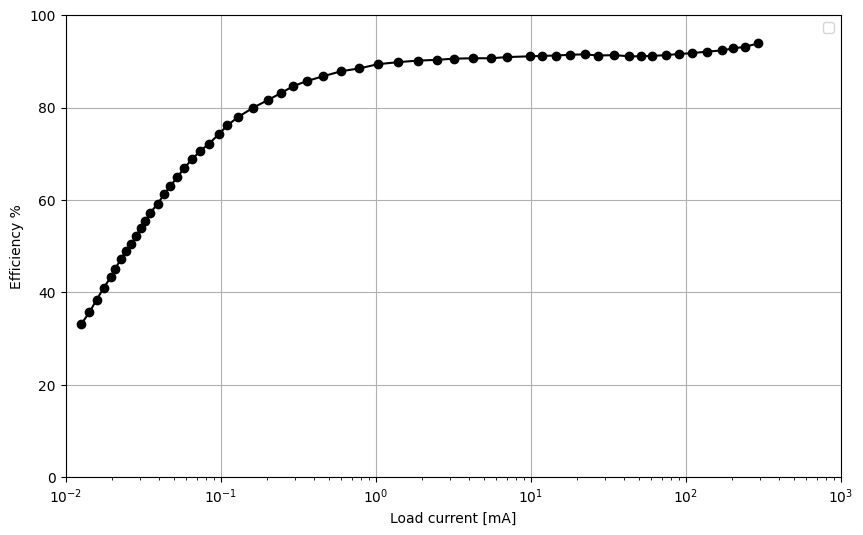

Load current: 0.012643505487907276, 0.01421674881699062, 0.01583034537148356, 0.017627058607286347, 0.019627695281015142, 0.020813048748016472, 0.022726676720790564, 0.02433587363204534, 0.026573403034296676, 0.028455057273212337, 0.030469860882036626, 0.03262737389489382, 0.03493765630891989, 0.03928498188048593, 0.043318299818731025, 0.047301143047022515, 0.0526697302627051, 0.05807723607541919, 0.06530413065054004, 0.07342998530420501, 0.08419702338844003, 0.09749073969233467, 0.11069874334956091, 0.12943565654396852, 0.1620606068103716, 0.2009350672226939, 0.24431199309535095, 0.294164666537941, 0.36118039565911053, 0.4566586314640485, 0.6003966558592823, 0.7816967783105466, 1.0378348411333018, 1.391434551402477, 1.865508878775378, 2.501104614142313, 3.193331254406034, 4.239687980120951, 5.574173594377376, 7.047699038073137, 9.922130869587287, 11.830545645430776, 14.525767203292915, 18.010151059536017, 22.54973935722633, 27.151008380633296, 34.66554863809592, 43.40312170211666, 51.

In [ ]:
# Battery Converter
# I choose V_IN = 2.4V

# Extract digitalized curve points
trace_batt_DCDCconv = np.loadtxt('datasheet/Battery_DCDCconv/trace_batt_DCDCconv.txt', delimiter=',', skiprows=1)

# Extract columns
load_current = trace_batt_DCDCconv[:, 0]
eta = trace_batt_DCDCconv[:, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(load_current, eta, 'o-', color='black')
plt.xlabel('Load current [mA]')
plt.ylabel('Efficiency %')
plt.xscale('log')
plt.xlim(0.01, 1000)
plt.ylim(0, 100)

plt.legend()
plt.grid(True)
plt.show()

print(f"Load current: {', '.join(map(str, load_current))}")
print(f"Efficiency: {', '.join(map(str, eta))}")

# Load current: 0.012643505487907276, 0.01421674881699062, 0.01583034537148356, 0.017627058607286347, 0.019627695281015142, 0.020813048748016472, 0.022726676720790564, 0.02433587363204534, 0.026573403034296676, 0.028455057273212337, 0.030469860882036626, 0.03262737389489382, 0.03493765630891989, 0.03928498188048593, 0.043318299818731025, 0.047301143047022515, 0.0526697302627051, 0.05807723607541919, 0.06530413065054004, 0.07342998530420501, 0.08419702338844003, 0.09749073969233467, 0.11069874334956091, 0.12943565654396852, 0.1620606068103716, 0.2009350672226939, 0.24431199309535095, 0.294164666537941, 0.36118039565911053, 0.4566586314640485, 0.6003966558592823, 0.7816967783105466, 1.0378348411333018, 1.391434551402477, 1.865508878775378, 2.501104614142313, 3.193331254406034, 4.239687980120951, 5.574173594377376, 7.047699038073137, 9.922130869587287, 11.830545645430776, 14.525767203292915, 18.010151059536017, 22.54973935722633, 27.151008380633296, 34.66554863809592, 43.40312170211666, 51.24813931223539, 61.105165749745346, 74.29637384580175, 91.22248988995311, 109.83657970155772, 137.52127467822424, 172.18399408021136, 201.328222428979, 240.0525961466715, 294.740237401469
# Efficiency: 33.19185265166475, 35.65365113642776, 38.37010715403199, 41.00169015095946, 43.37860279144204, 45.07639020687038, 47.11374664662765, 48.896426318138225, 50.50932788928614, 52.20712171651629, 53.90491554374644, 55.3480390145317, 57.13073150964591, 59.16807512579955, 61.29031740983724, 62.98811764886922, 64.94057542074243, 66.89303319261565, 68.76060512020847, 70.54329761532267, 72.15619277466878, 74.27843505870646, 76.14600698629927, 77.92868986371076, 79.96604630346802, 81.57894466871502, 83.10696360148344, 84.63497291654912, 85.73854018660909, 86.75721520058681, 87.86077926474587, 88.45500902781697, 89.38879819751428, 89.8132434484209, 90.15279964914622, 90.32258095540978, 90.57724810595376, 90.66214036203598, 90.66214036203598, 90.91680430667905, 91.08658881884352, 91.17147786902486, 91.25637012510708, 91.42614501956884, 91.51103727565106, 91.25637012510708, 91.34125276348658, 91.08658881884352, 91.08658881884352, 91.17147786902486, 91.34125276348658, 91.59592632583238, 91.76570122029413, 92.10526703872218, 92.35993418926616, 92.78437944017277, 93.12393884679898, 93.88794991613365


# Battery model

![](datasheet/Battery/datasheet.jpg)

The selected curve for the digitalization are:
- 0.5C
- 1C
Note: it is important to invert the x axis: 0 when the curve intersects the x axis, 1 at the origin.

In [55]:
from scipy.interpolate import interp1d

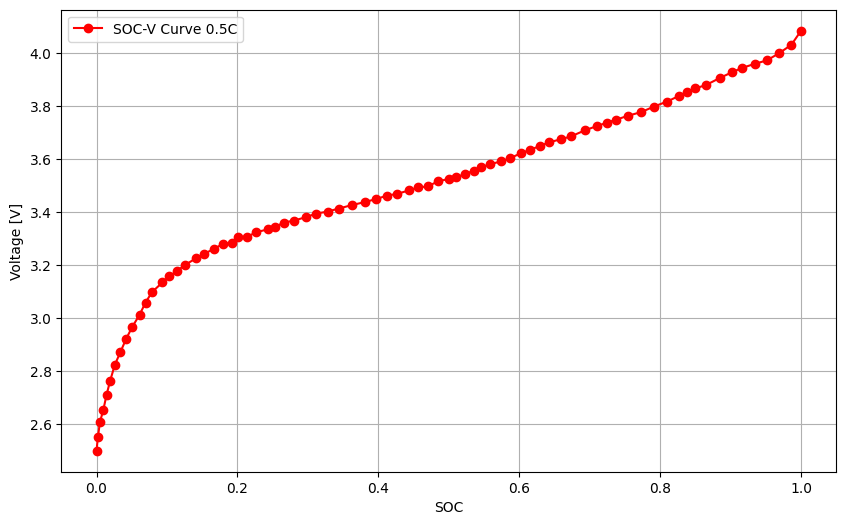

New X: 0.0, 0.010101010101010102, 0.020202020202020204, 0.030303030303030304, 0.04040404040404041, 0.05050505050505051, 0.06060606060606061, 0.07070707070707072, 0.08080808080808081, 0.09090909090909091, 0.10101010101010102, 0.11111111111111112, 0.12121212121212122, 0.13131313131313133, 0.14141414141414144, 0.15151515151515152, 0.16161616161616163, 0.17171717171717174, 0.18181818181818182, 0.19191919191919193, 0.20202020202020204, 0.21212121212121213, 0.22222222222222224, 0.23232323232323235, 0.24242424242424243, 0.25252525252525254, 0.26262626262626265, 0.27272727272727276, 0.2828282828282829, 0.29292929292929293, 0.30303030303030304, 0.31313131313131315, 0.32323232323232326, 0.33333333333333337, 0.3434343434343435, 0.3535353535353536, 0.36363636363636365, 0.37373737373737376, 0.38383838383838387, 0.393939393939394, 0.4040404040404041, 0.4141414141414142, 0.42424242424242425, 0.43434343434343436, 0.4444444444444445, 0.4545454545454546, 0.4646464646464647, 0.4747474747474748, 0.4848484

In [ ]:
# Curve for 0.5C
# Extract digitalized points
data = np.loadtxt('datasheet/Battery/trace_05C.txt', delimiter=',', skiprows=1)
voltage_05C = data[:, 1]
soc_05C = data[:, 0]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(soc_05C, voltage_05C, 'o-', label='SOC-V Curve 0.5C', color='red')

plt.ylabel('Voltage [V]')
plt.xlabel('SOC')
plt.legend()
plt.grid(True)
plt.show()

# Interpolate
newX_05C = np.linspace(0, 1, 100)   # 0.01 resolution
newX_05C = np.linspace(min(soc_05C), max(soc_05C), 100)   # Ensure newX_05C is within the range of soc_05C
interp_func = interp1d(soc_05C, voltage_05C, bounds_error=False)
newY_05C = interp_func(newX_05C)

print(f"SOC: {', '.join(map(str, newX_05C))}")
print(f"Voltage 0.5C: {', '.join(map(str, newY_05C))}")


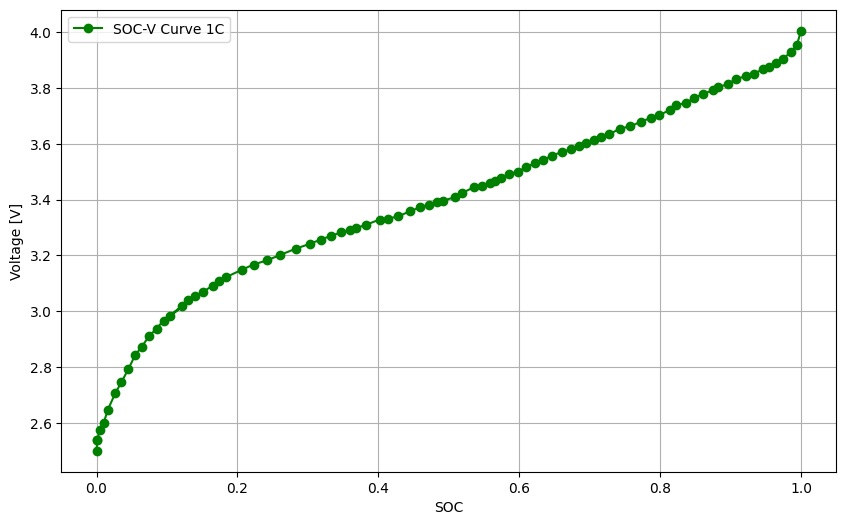

New X: 0.0, 0.010101010101010102, 0.020202020202020204, 0.030303030303030304, 0.04040404040404041, 0.05050505050505051, 0.06060606060606061, 0.07070707070707072, 0.08080808080808081, 0.09090909090909091, 0.10101010101010102, 0.11111111111111112, 0.12121212121212122, 0.13131313131313133, 0.14141414141414144, 0.15151515151515152, 0.16161616161616163, 0.17171717171717174, 0.18181818181818182, 0.19191919191919193, 0.20202020202020204, 0.21212121212121213, 0.22222222222222224, 0.23232323232323235, 0.24242424242424243, 0.25252525252525254, 0.26262626262626265, 0.27272727272727276, 0.2828282828282829, 0.29292929292929293, 0.30303030303030304, 0.31313131313131315, 0.32323232323232326, 0.33333333333333337, 0.3434343434343435, 0.3535353535353536, 0.36363636363636365, 0.37373737373737376, 0.38383838383838387, 0.393939393939394, 0.4040404040404041, 0.4141414141414142, 0.42424242424242425, 0.43434343434343436, 0.4444444444444445, 0.4545454545454546, 0.4646464646464647, 0.4747474747474748, 0.4848484

In [ ]:
# Do the same for another curve for 1.0C
# Extract digitalized points
data = np.loadtxt('datasheet/Battery/trace_1C.txt', delimiter=',', skiprows=1)
voltage_1C = data[:, 1]
soc_1C = data[:, 0]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(soc_1C, voltage_1C, 'o-', label='SOC-V Curve 1C', color='green')
plt.ylabel('Voltage [V]')
plt.xlabel('SOC')
plt.legend()
plt.grid(True)
plt.show()

# Interpolate
newX_1C = np.linspace(0, 1, 100)   # 0.01 resolution
interp_func = interp1d(soc_1C, voltage_1C, bounds_error=False)
newY_1C = interp_func(newX_1C)

print(f"SOC: {', '.join(map(str, newX_1C))}")
print(f"Voltage 1C: {', '.join(map(str, newY_1C))}")

To derive $V_{OC}$ and $R$ the equations on the slides must be solved in function of $SOC$.
$$
V_{OC} = V_{curve1} + R \bullet I_{curve1}
$$
$$
R = \frac{V_{curve2}-V_{curve1}}{I_{curve1}-I_{curve2}}
$$

In [ ]:
# Curve 1: 0.5C
# The current is I = 0.5C = 0.5 * 3200 mA = 1600 mA
i_05C = 0.5 * 3200 #[mA] # * 1e-3 # [A]

# Curve 2: 1C
# The current is I = 1C = 1 * 3200 mA = 3200 mA
i_1C = 1 * 3200 # [mA]  # * 1e-3 # [A]

# The resistance will be in function of the SOC
R = (newY_1C - newY_05C)/(i_05C - i_1C) # [kOhm]
V_OC = newY_05C + R * i_05C # [V]

print(R)
print(V_OC)


[-0.00000000e+00  3.75894319e-05  6.33086013e-05  7.97741097e-05
  8.89830923e-05  9.11123443e-05  9.35689746e-05  1.04711062e-04
  1.10747196e-04  1.08801973e-04  1.09791039e-04  1.10066280e-04
  1.08667653e-04  1.06295945e-04  1.06893736e-04  1.06492303e-04
  1.05442416e-04  1.02915381e-04  1.00770315e-04  9.61550435e-05
  1.01387990e-04  9.50942814e-05  9.49881911e-05  9.59307346e-05
  9.51245116e-05  9.43759322e-05  9.57203270e-05  9.40895637e-05
  9.14147836e-05  9.07253291e-05  9.06256186e-05  8.98861129e-05
  8.68193845e-05  8.48469924e-05  8.39684835e-05  8.38172238e-05
  8.36552058e-05  8.21921457e-05  8.09657394e-05  7.92089236e-05
  7.90698700e-05  8.21039012e-05  8.14835846e-05  8.04507563e-05
  7.82970793e-05  7.75946095e-05  7.46224251e-05  7.42973319e-05
  7.69500262e-05  7.74831400e-05  7.65247079e-05  7.36097909e-05
  7.19441924e-05  7.00019932e-05  7.64689689e-05  7.55401073e-05
  7.46314622e-05  7.12651318e-05  6.80990183e-05  7.29854722e-05
  7.17721354e-05  7.03557

### How to use `curve_fit`

In [44]:
from scipy.optimize import curve_fit

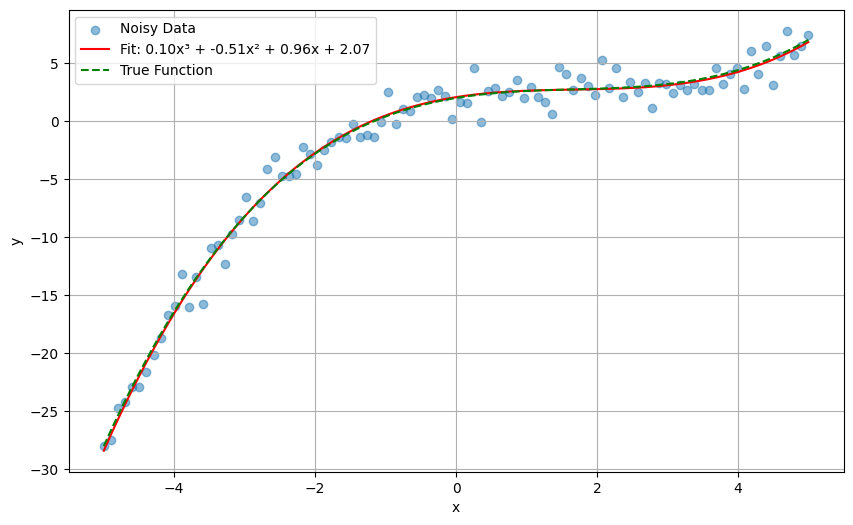

In [97]:
# Define polynomial function (3rd degree)
def poly_func(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

# Generate data
x_data = np.linspace(-5, 5, 100)
true_params = [0.1, -0.5, 1.0, 2.0]  # True coefficients
y_true = poly_func(x_data, *true_params)
noise = np.random.normal(0, 1, len(x_data))
y_data = y_true + noise

# Fit the data
popt, pcov = curve_fit(poly_func, x_data, y_data)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, alpha=0.5, label='Noisy Data')
plt.plot(x_data, poly_func(x_data, *popt), 'r-', 
         label=f'Fit: {popt[0]:.2f}x³ + {popt[1]:.2f}x² + {popt[2]:.2f}x + {popt[3]:.2f}')
plt.plot(x_data, y_true, 'g--', label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

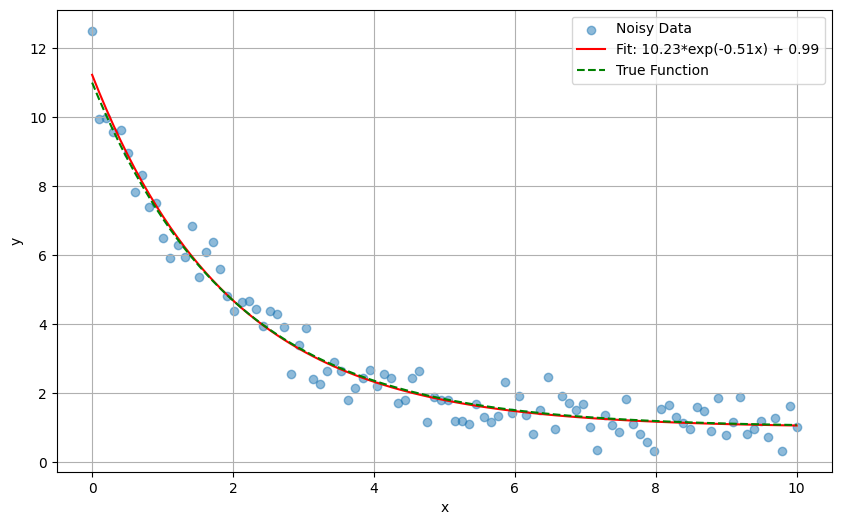

In [46]:
# Define exponential decay function
def exp_decay(x, A, k, c):
    return A * np.exp(-k * x) + c

# Generate data
x_data = np.linspace(0, 10, 100)
true_params = [10.0, 0.5, 1.0]  # [amplitude, decay rate, offset]
y_true = exp_decay(x_data, *true_params)
noise = np.random.normal(0, 0.5, len(x_data))
y_data = y_true + noise

# Fit the data
popt, pcov = curve_fit(exp_decay, x_data, y_data)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, alpha=0.5, label='Noisy Data')
plt.plot(x_data, exp_decay(x_data, *popt), 'r-', 
         label=f'Fit: {popt[0]:.2f}*exp(-{popt[1]:.2f}x) + {popt[2]:.2f}')
plt.plot(x_data, y_true, 'g--', label='True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#### Overfitting Example

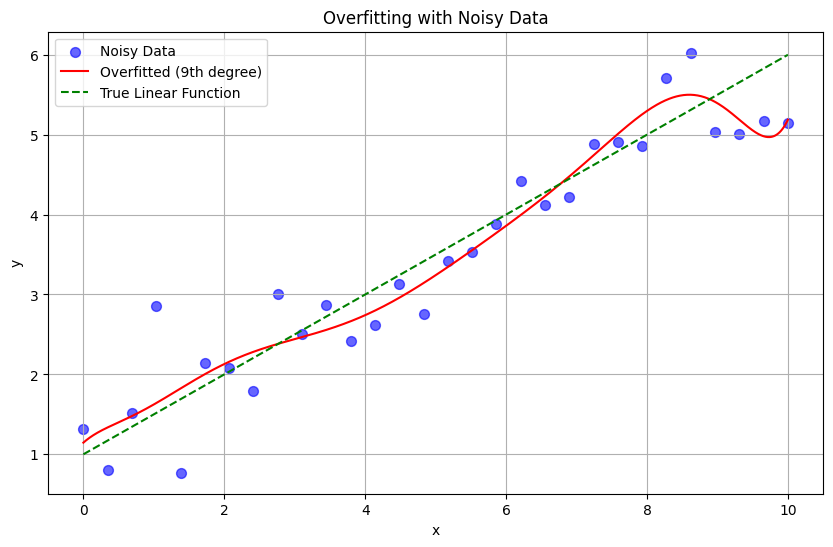

In [47]:
# Define high degree polynomial for overfitting
def complex_func(x, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9):
    return (a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + 
            a5*x**5 + a6*x**6 + a7*x**7 + a8*x**8 + a9*x**9)

# Generate more points with higher noise
x_data = np.linspace(0, 10, 30)  # Increased to 30 points
true_params = [1.0, 0.5]
y_true = true_params[0] + true_params[1] * x_data
noise = np.random.normal(0, 0.5, len(x_data))  # Increased noise standard deviation to 0.5
y_data = y_true + noise

# Fit with overly complex function
initial_guess = np.ones(10)
popt, pcov = curve_fit(complex_func, x_data, y_data, p0=initial_guess)

# Generate smooth points for plotting
x_smooth = np.linspace(0, 10, 1000)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='blue', s=50, alpha=0.6, label='Noisy Data')
plt.plot(x_smooth, complex_func(x_smooth, *popt), 'r-', 
         label='Overfitted (9th degree)')
plt.plot(x_smooth, true_params[0] + true_params[1]*x_smooth, 'g--',
         label='True Linear Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Overfitting with Noisy Data')
plt.grid(True)
plt.show()

### TODO: Fit the data

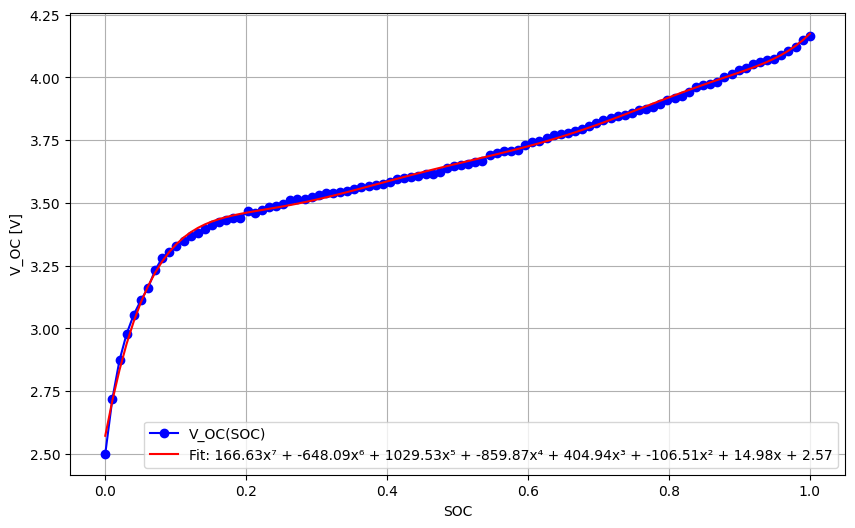

const double V_SOC_coefficients[] = {1.67e+02, -6.48e+02, 1.03e+03, -8.60e+02, 4.05e+02, -1.07e+02, 1.50e+01, 2.57e+00};


In [106]:
# Fit the data to obtain V_OC(SOC)

# Define polynomial function (7th degree)
def poly_func(x, a, b, c, d, e, f, g, h):
    return a*x**7 + b*x**6 + c*x**5 + d*x**4 + e*x**3 + f*x**2 + g*x + h

# First plot the data obtained from the V_OC(SOC) curve
plt.figure(figsize=(10, 6))
plt.plot(newX_05C, V_OC, 'o-', label='V_OC(SOC)', color='blue')
plt.ylabel('V_OC [V]')
plt.xlabel('SOC')
plt.legend()
plt.grid(True)

# Fit the data
x_data = np.linspace(0, 1, 100)
y_data = V_OC
popt, pcov = curve_fit(poly_func, x_data, y_data)

# Plot the fitted curve
plt.plot(x_data, poly_func(x_data, *popt), 'r-', 
         label=f'Fit: {popt[0]:.2f}x⁷ + {popt[1]:.2f}x⁶ + {popt[2]:.2f}x⁵ + {popt[3]:.2f}x⁴ + {popt[4]:.2f}x³ + {popt[5]:.2f}x² + {popt[6]:.2f}x + {popt[7]:.2f}')
plt.legend()
plt.show()

# Print the ceofficients to be used in the simulator:
coefficients = ', '.join([f'{coef:.2e}' for coef in popt])
print(f'const double V_SOC_coefficients[] = {{{coefficients}}};')


C:\Users\Diego\AppData\Local\Temp\ipykernel_8172\1265342004.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(poly_func, x_data, y_data)


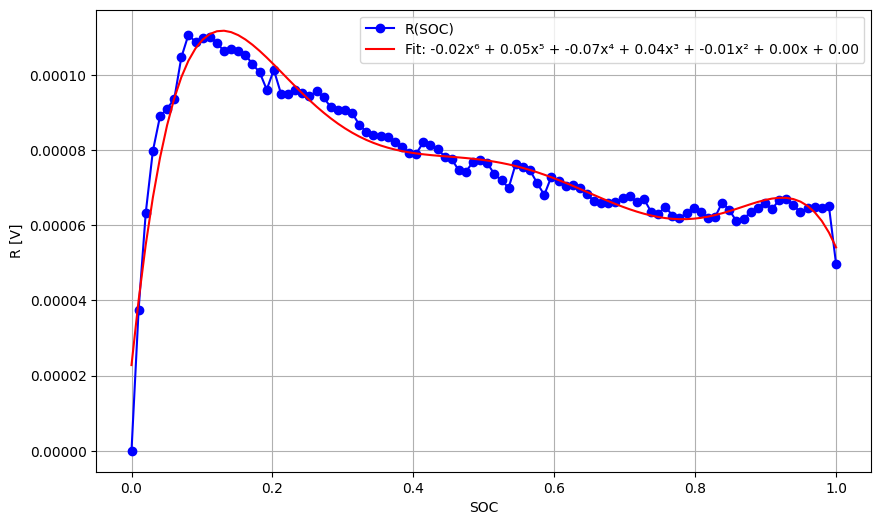

R(SOC) = -0.02x⁶ + 0.05x⁵ + -0.07x⁴ + 0.04x³ + -0.01x² + 0.00x + 0.00
const double R_SOC_coefficients[] = {-1.63e-02, 5.33e-02, -6.80e-02, 4.25e-02, -1.34e-02, 1.84e-03, 2.28e-05, 1.00e+00};


In [ ]:
# Fit the data to obtain R(SOC)

# Define polynomial function (6th degree)
def poly_func(x, a, b, c, d, e, f, g, h):
    # return a*x**7 + b*x**6 + c*x**5 + d*x**4 + e*x**3 + f*x**2 + g*x + h
    return a*x**6 + b*x**5 + c*x**4 + d*x**3 + e*x**2 + f*x**1 + g

# First plot the data obtained from the V_OC(SOC) curve
plt.figure(figsize=(10, 6))
plt.plot(newX_05C, R, 'o-', label='R(SOC)', color='blue')
plt.ylabel('R [V]')
plt.xlabel('SOC')
plt.legend()
plt.grid(True)

# Fit the data
x_data = np.linspace(0, 1, 100)
y_data = R
popt, pcov = curve_fit(poly_func, x_data, y_data)

# Plot the fitted curve
plt.plot(x_data, poly_func(x_data, *popt), 'r-', 
         label=f'Fit: {popt[0]:.2f}x⁶ + {popt[1]:.2f}x⁵ + {popt[2]:.2f}x⁴ + {popt[3]:.2f}x³ + {popt[4]:.2f}x² + {popt[5]:.2f}x + {popt[6]:.2f}')
plt.legend()
plt.show()


# Print the coefficient polynomial to be used in the simulator:
coefficients = ', '.join([f'{coef:.2e}' for coef in popt])
print(f'const double R_SOC_coefficients[] = {{{coefficients}}};')



header indexes: {0: 'time', 1: 'soc', 2: 'i_tot', 3: 'i_mcu', 4: 'i_rf', 5: 'i_pv', 6: 'v_pv', 7: 'real_i_pv', 8: 'i_batt', 9: 'v_batt', 10: 'i_air_quality_sensor', 11: 'i_methane_sensor', 12: 'i_temperature_sensor', 13: 'i_mic_click_sensor'}
[66.653      66.653      66.653      ... 68.36388981 68.36388981
 68.36388981]
Total power consumed by loads: [219.9549 219.9549 219.9549 ... 218.4831 218.4831 218.4831]


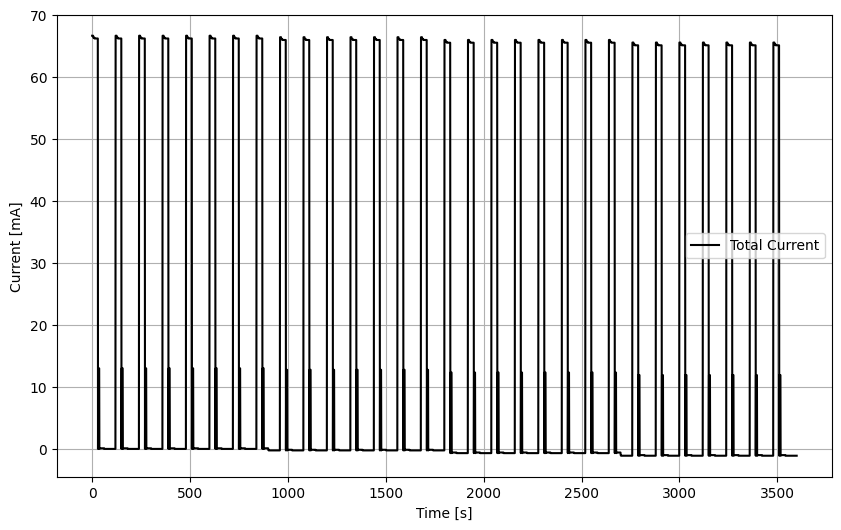

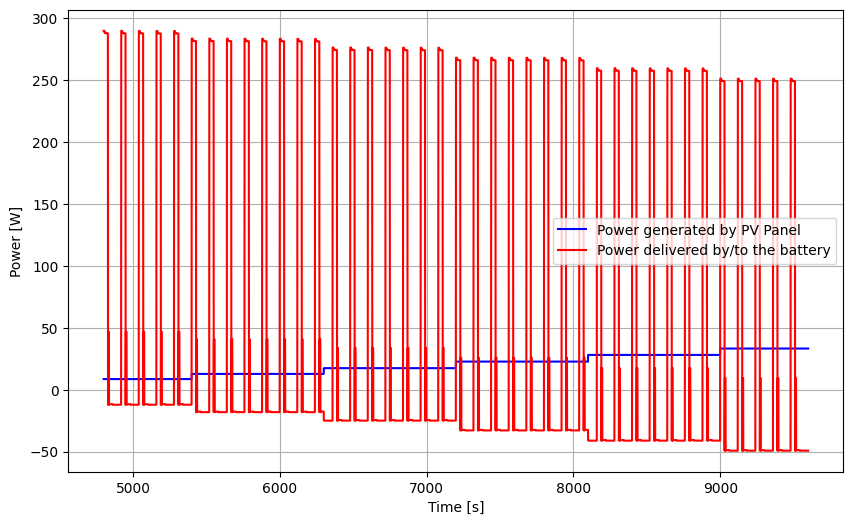

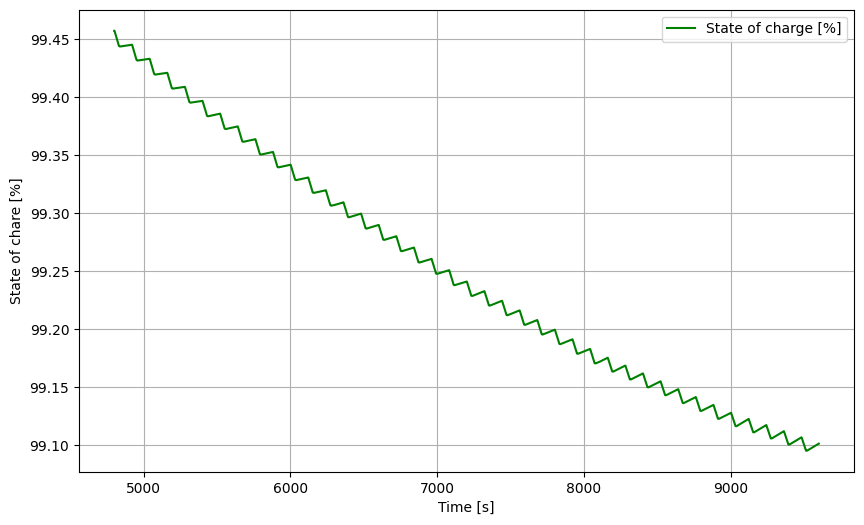

In [ ]:
# From the sim_trace.txt file obtained from the simulator, we can plot the information about the power over time:
import numpy as np
import matplotlib.pyplot as plt

header = ['time', 'soc', 'i_tot', 'i_mcu', 'i_rf', 'i_pv', 'v_pv', 'real_i_pv', 'i_batt', 'v_batt', 'i_air_quality_sensor', 'i_methane_sensor', 'i_temperature_sensor', 'i_mic_click_sensor']

header_dict = {index: value for index, value in enumerate(header)}
print(f"header indexes: {header_dict}")


# Read data from the file
data = np.loadtxt('sim_trace_parallel.txt', delimiter=' ', skiprows=1)    # Parallel execution, default configuration

# Save data in different arrays based on the header variable
time = data[:, header.index('time')]
soc = data[:, header.index('soc')]
i_tot = data[:, header.index('i_tot')]
i_mcu = data[:, header.index('i_mcu')]
i_rf = data[:, header.index('i_rf')]
i_pv = data[:, header.index('i_pv')]
v_pv = data[:, header.index('v_pv')]
real_i_pv = data[:, header.index('real_i_pv')]
i_batt = data[:, header.index('i_batt')]
v_batt = data[:, header.index('v_batt')]
i_air_quality_sensor = data[:, header.index('i_air_quality_sensor')]
i_methane_sensor = data[:, header.index('i_methane_sensor')]
i_temperature_sensor = data[:, header.index('i_temperature_sensor')]
i_mic_click_sensor = data[:, header.index('i_mic_click_sensor')]

# print(i_air_quality_sensor)
print (i_tot)
# The load use 3.3V so we can calculate the power used by each load as P = V * I:

P_mcu = 3.3 * i_mcu   # The power used by the MCU [W]
P_rf = 3.3 * i_rf   # The power used by the RF module [W]
P_temperature_sensor = 3.3 * i_temperature_sensor   # The power used by the temperature sensor [W]
P_air_quality_sensor = 3.3 * i_air_quality_sensor   # The power used by the air quality sensor [W]
P_methane_sensor = 3.3 * i_methane_sensor   # The power used by the methane sensor [W]
P_mic_click_sensor = 3.3 * i_mic_click_sensor   # The power used by the mic click sensor [W]

# Total power consumed by loads:
P_total = P_mcu + P_rf + P_temperature_sensor + P_air_quality_sensor + P_methane_sensor + P_mic_click_sensor
print(f"Total power consumed by loads: {P_total}")

# The power generated by the PV panel is
P_pv = v_pv * real_i_pv


P_batt = v_batt * i_tot

T = 120 # seconds
# Plot the total current requested or generated by the battery over time
plt.figure(figsize=(10, 6))
plt.plot(time[:30*T], i_tot[:30*T], label='Total Current', color='black') # Plot only the first T = 120 seconds

plt.xlabel('Time [s]')
plt.ylabel('Current [mA]')
plt.legend() 
plt.grid(True)
plt.show()



"""
Printing only the first 3 periods we can see that the for the first T/2 is requested from the battery a current of around 66.5 mA.


"""


# Plot the power used by sensors over time
plt.figure(figsize=(10, 6))
# plt.plot(time, P_mcu, label='MCU', color='red')
# plt.plot(time, P_rf, label='RF Module', color='green')
# plt.plot(time, P_temperature_sensor, label='Temperature Sensor', color='orange')
# plt.plot(time, P_air_quality_sensor, label='Air Quality Sensor', color='blue')
# plt.plot(time, P_methane_sensor, label='Methane Sensor', color='purple')
# plt.plot(time, P_mic_click_sensor, label='Mic Click Sensor', color='black')

# plt.plot(time, P_total, label='Total Power Consumed', color='black')
start_T = T * 40
end_T = T * 80
plt.plot(time[start_T:end_T], P_pv[start_T:end_T], label='Power generated by PV Panel', color='blue')
# plt.plot(time[start_T:], P_pv[start_T:], label='Power generated by PV Panel', color='blue')
plt.plot(time[start_T:end_T], P_batt[start_T:end_T], label='Power delivered by/to the battery', color='red')
# plt.plot(time[start_T:], P_batt[start_T:], label='Power delivered by/to the battery', color='red')


plt.xlabel('Time [s]')
plt.ylabel('Power [W]')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
# Normalize the state of charge to a percentage scale
soc_percentage = soc * 100
plt.plot(time[start_T:end_T], soc_percentage[start_T:end_T], label='State of charge [%]', color='green')
# plt.plot(time[start_T:], soc_percentage[start_T:], label='State of charge [%]', color='green')
plt.xlabel('Time [s]')
plt.ylabel('State of chare [%]')
plt.legend()
plt.grid(True)
plt.show()


# Sequential scheduling


From the slides:
| Sensor | Active Time (s) |
|--------|-------------|
|Air quality sensor | 30|  
| Methane sensor| 30|  
| Temperature sensor| 6|
|Mic click sensor| 12|
|ZigBee transmission|24|
|Memory and control| 6|

If a fully sequential schedule is used, the worst case execution time is 108s, that is still lower than the period T=120s.
So the first hypotesis is to schedule the load as described here: 


| Sensor                | Active Time | Start Time |
| ------------------    | ----------- | ---------- |
|Air quality sensor     | 30          |    0         |
| Methane sensor        | 30          |    30         |
| Temperature sensor    | 6             |   60       |
|Mic click sensor       | 12            |   66      |
|Memory and control     | 6             |   78      |
|ZigBee transmission    |24             |   84      |


memory, control and transmission are not controlled by the configuration but are executed by the simulater after the execution of the sensors is completed.

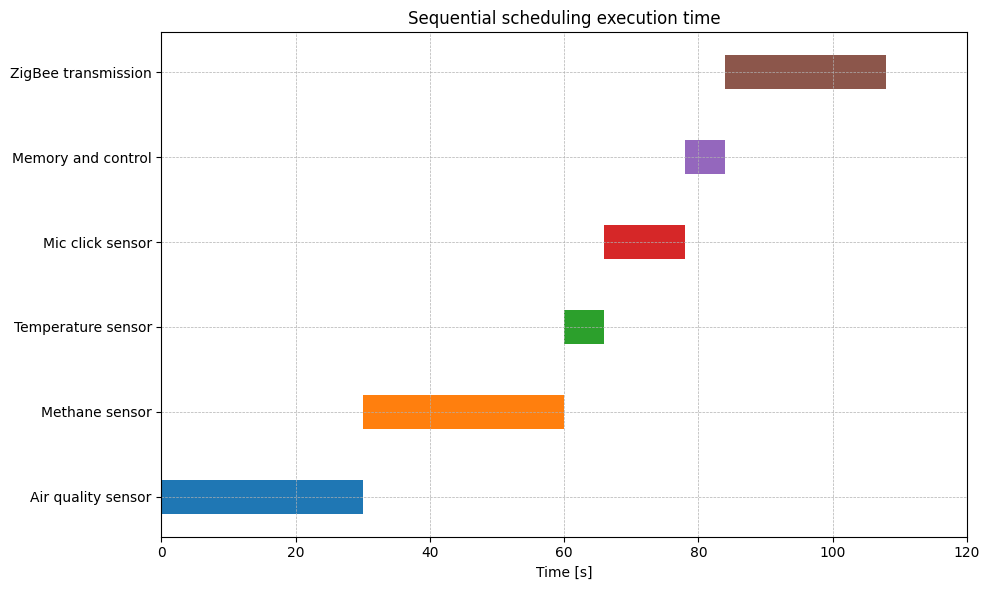

In [74]:
import matplotlib.pyplot as plt

schedule = [
    ("Air quality sensor", 30, 0),
    ("Methane sensor", 30, 30),
    ("Temperature sensor", 6, 60),
    ("Mic click sensor", 12, 66),
    ("Memory and control", 6, 78),
    ("ZigBee transmission", 24, 84)
]

fig, ax = plt.subplots(figsize=(10, 6))

# Add tasks to the Gantt chart
for task, duration, start in schedule:
    ax.barh(task, duration, left=start, height=0.4)

# Add labels and grid
ax.set_xlabel('Time [s]')
ax.set_title('Sequential scheduling execution time')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set x-axis limits
ax.set_xlim(0, 120)

# Show the plot
plt.tight_layout()
plt.show()

header indexes: {0: 'time', 1: 'soc', 2: 'i_tot', 3: 'i_mcu', 4: 'i_rf', 5: 'i_pv', 6: 'v_pv', 7: 'real_i_pv', 8: 'i_batt', 9: 'v_batt', 10: 'i_air_quality_sensor', 11: 'i_methane_sensor', 12: 'i_temperature_sensor', 13: 'i_mic_click_sensor'}
[48.209      48.209      48.209      ... 20.16588981 20.16588981
 20.16588981]
Total power consumed by loads: [159.0897 159.0897 159.0897 ...  59.4297  59.4297  59.4297]


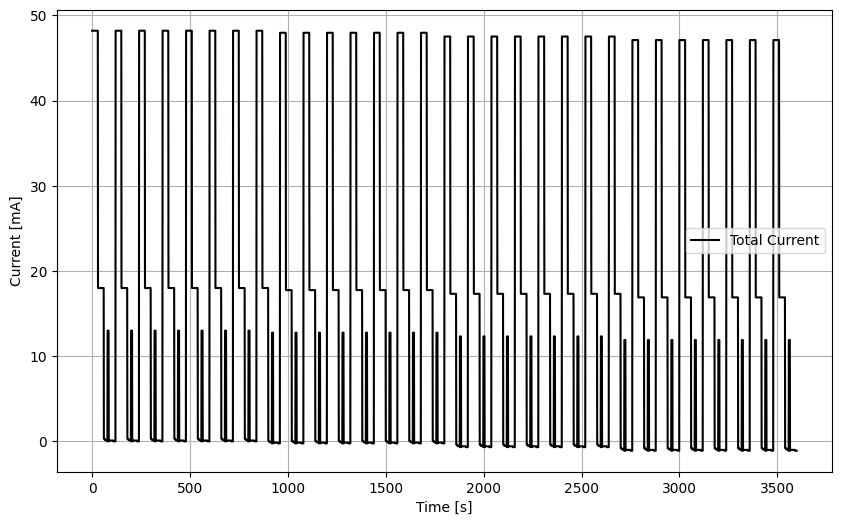

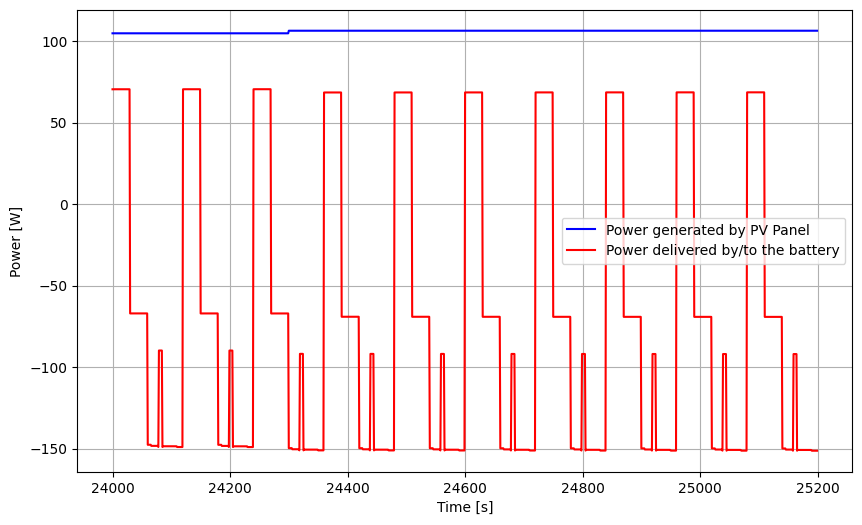

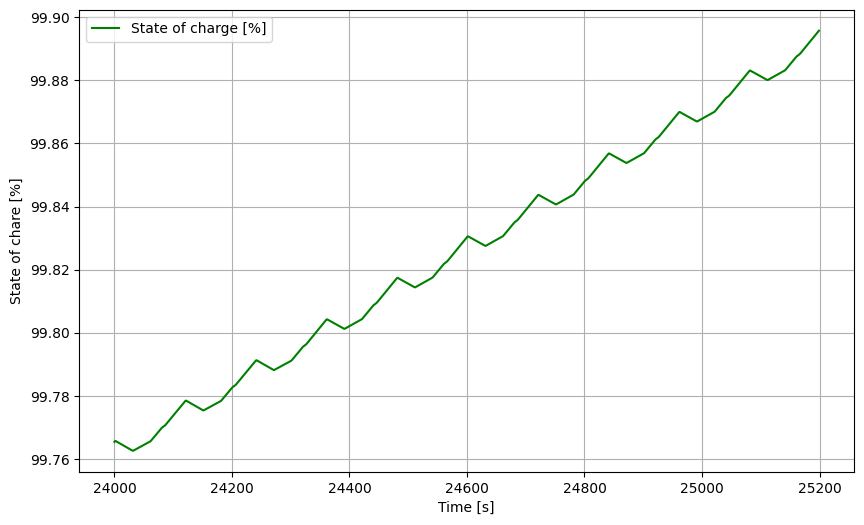

In [ ]:
# From the sim_trace.txt file obtained from the simulator, we can plot the information about the power over time:
import numpy as np
import matplotlib.pyplot as plt

header = ['time', 'soc', 'i_tot', 'i_mcu', 'i_rf', 'i_pv', 'v_pv', 'real_i_pv', 'i_batt', 'v_batt', 'i_air_quality_sensor', 'i_methane_sensor', 'i_temperature_sensor', 'i_mic_click_sensor']

header_dict = {index: value for index, value in enumerate(header)}
print(f"header indexes: {header_dict}")


# Read data from the file
data = np.loadtxt('sim_trace_sequential.txt', delimiter=' ', skiprows=1)    # Sequential execution, custom scheduling

# Save data in different arrays based on the header variable
time = data[:, header.index('time')]
soc = data[:, header.index('soc')]
i_tot = data[:, header.index('i_tot')]
i_mcu = data[:, header.index('i_mcu')]
i_rf = data[:, header.index('i_rf')]
i_pv = data[:, header.index('i_pv')]
v_pv = data[:, header.index('v_pv')]
real_i_pv = data[:, header.index('real_i_pv')]
i_batt = data[:, header.index('i_batt')]
v_batt = data[:, header.index('v_batt')]
i_air_quality_sensor = data[:, header.index('i_air_quality_sensor')]
i_methane_sensor = data[:, header.index('i_methane_sensor')]
i_temperature_sensor = data[:, header.index('i_temperature_sensor')]
i_mic_click_sensor = data[:, header.index('i_mic_click_sensor')]

# print(i_air_quality_sensor)
# print(i_tot)
# The load use 3.3V so we can calculate the power used by each load as P = V * I:

P_mcu = 3.3 * i_mcu   # The power used by the MCU [W]
P_rf = 3.3 * i_rf   # The power used by the RF module [W]
P_temperature_sensor = 3.3 * i_temperature_sensor   # The power used by the temperature sensor [W]
P_air_quality_sensor = 3.3 * i_air_quality_sensor   # The power used by the air quality sensor [W]
P_methane_sensor = 3.3 * i_methane_sensor   # The power used by the methane sensor [W]
P_mic_click_sensor = 3.3 * i_mic_click_sensor   # The power used by the mic click sensor [W]

# Total power consumed by loads:
P_total = P_mcu + P_rf + P_temperature_sensor + P_air_quality_sensor + P_methane_sensor + P_mic_click_sensor
print(f"Total power consumed by loads: {P_total}")

# The power generated by the PV panel is
P_pv = v_pv * real_i_pv

P_batt = v_batt * i_tot

T = 120 # seconds
# Plot the total current requested or generated by the battery over time
plt.figure(figsize=(10, 6))
plt.plot(time[:30*T], i_tot[:30*T], label='Total Current', color='black') # Plot only the first T = 120 seconds

plt.xlabel('Time [s]')
plt.ylabel('Current [mA]')
plt.legend() 
plt.grid(True)
plt.show()


# Plot the power used by sensors over time
plt.figure(figsize=(10, 6))

start_T = T * 200
end_T = T * 210
plt.plot(time[start_T:end_T], P_pv[start_T:end_T], label='Power generated by PV Panel', color='blue')
# plt.plot(time[start_T:], P_pv[start_T:], label='Power generated by PV Panel', color='blue')
plt.plot(time[start_T:end_T], P_batt[start_T:end_T], label='Power delivered by/to the battery', color='red')
# plt.plot(time[start_T:], P_batt[start_T:], label='Power delivered by/to the battery', color='red')


plt.xlabel('Time [s]')
plt.ylabel('Power [W]')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
# Normalize the state of charge to a percentage scale
soc_percentage = soc * 100
plt.plot(time[start_T:end_T], soc_percentage[start_T:end_T], label='State of charge [%]', color='green')
plt.xlabel('Time [s]')
plt.ylabel('State of chare [%]')
plt.legend()
plt.grid(True)
plt.show()


# Third analysis

Increase the number of PV panels by 1.

2 PV panels in series:
The simulation ends @ 2059207 s

header indexes: {0: 'time', 1: 'soc', 2: 'i_tot', 3: 'i_mcu', 4: 'i_rf', 5: 'i_pv', 6: 'v_pv', 7: 'real_i_pv', 8: 'i_batt', 9: 'v_batt', 10: 'i_air_quality_sensor', 11: 'i_methane_sensor', 12: 'i_temperature_sensor', 13: 'i_mic_click_sensor'}
Total power consumed by loads: [2.199549e+02 2.199549e+02 2.199549e+02 ... 3.630000e-02 3.630000e-02
 3.630000e-02]


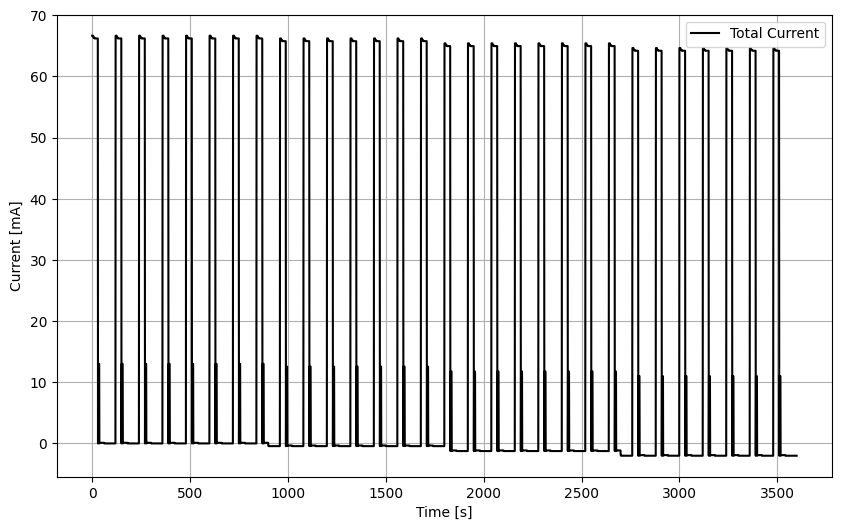

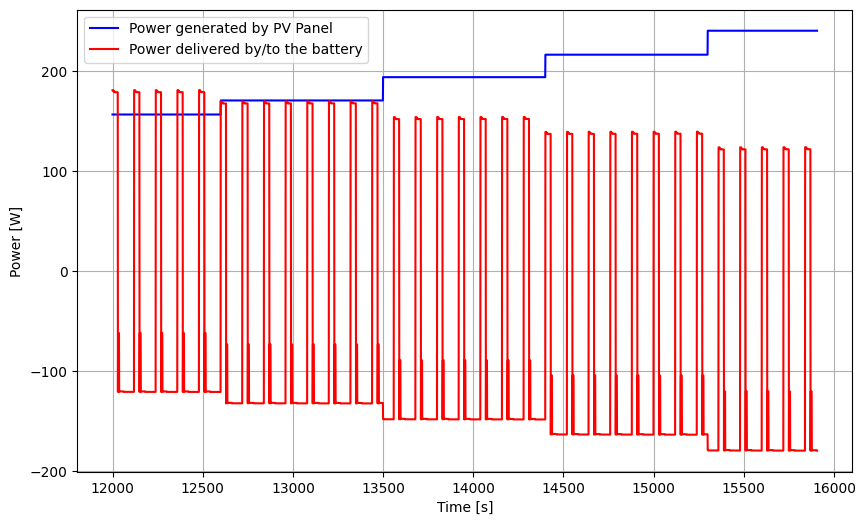

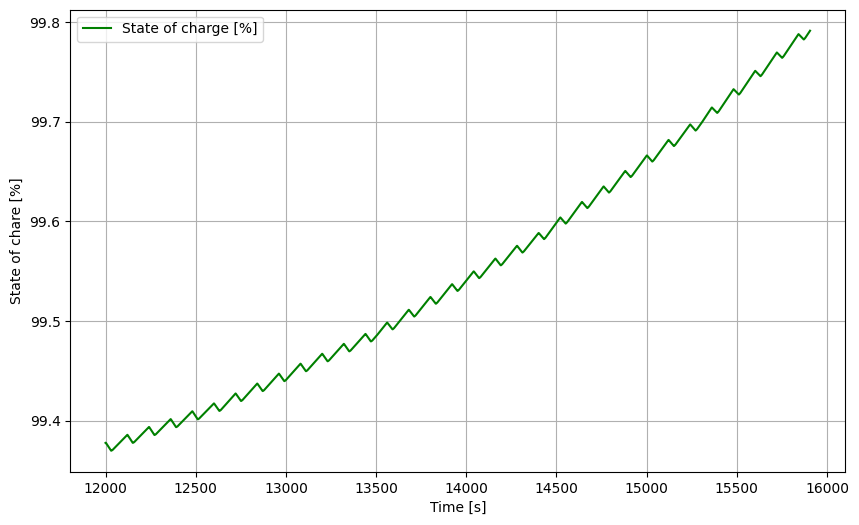

In [ ]:
# From the sim_trace.txt file obtained from the simulator, we can plot the information about the power over time:
import numpy as np
import matplotlib.pyplot as plt

header = ['time', 'soc', 'i_tot', 'i_mcu', 'i_rf', 'i_pv', 'v_pv', 'real_i_pv', 'i_batt', 'v_batt', 'i_air_quality_sensor', 'i_methane_sensor', 'i_temperature_sensor', 'i_mic_click_sensor']

header_dict = {index: value for index, value in enumerate(header)}
print(f"header indexes: {header_dict}")

# Read data from the file
data = np.loadtxt('sim_trace_2pv_series.txt', delimiter=' ', skiprows=1)    # Sequential execution, custom scheduling

# Save data in different arrays based on the header variable
time = data[:, header.index('time')]
soc = data[:, header.index('soc')]
i_tot = data[:, header.index('i_tot')]
i_mcu = data[:, header.index('i_mcu')]
i_rf = data[:, header.index('i_rf')]
i_pv = data[:, header.index('i_pv')]
v_pv = data[:, header.index('v_pv')]
real_i_pv = data[:, header.index('real_i_pv')]
i_batt = data[:, header.index('i_batt')]
v_batt = data[:, header.index('v_batt')]
i_air_quality_sensor = data[:, header.index('i_air_quality_sensor')]
i_methane_sensor = data[:, header.index('i_methane_sensor')]
i_temperature_sensor = data[:, header.index('i_temperature_sensor')]
i_mic_click_sensor = data[:, header.index('i_mic_click_sensor')]


P_mcu = 3.3 * i_mcu   # The power used by the MCU [W]
P_rf = 3.3 * i_rf   # The power used by the RF module [W]
P_temperature_sensor = 3.3 * i_temperature_sensor   # The power used by the temperature sensor [W]
P_air_quality_sensor = 3.3 * i_air_quality_sensor   # The power used by the air quality sensor [W]
P_methane_sensor = 3.3 * i_methane_sensor   # The power used by the methane sensor [W]
P_mic_click_sensor = 3.3 * i_mic_click_sensor   # The power used by the mic click sensor [W]

# Total power consumed by loads:
P_total = P_mcu + P_rf + P_temperature_sensor + P_air_quality_sensor + P_methane_sensor + P_mic_click_sensor
print(f"Total power consumed by loads: {P_total}")

# The power generated by the PV panel is
P_pv = v_pv * real_i_pv

P_batt = v_batt * i_tot

T = 120 # seconds
# Plot the total current requested or generated by the battery over time
plt.figure(figsize=(10, 6))
plt.plot(time[:30*T], i_tot[:30*T], label='Total Current', color='black') # Plot only the first T = 120 seconds

plt.xlabel('Time [s]')
plt.ylabel('Current [mA]')
plt.legend() 
plt.grid(True)
plt.show()


# Plot the power used by sensors over time
plt.figure(figsize=(10, 6))

start_T = T * 100
end_T = T * 210
plt.plot(time[start_T:end_T], P_pv[start_T:end_T], label='Power generated by PV Panel', color='blue')
# plt.plot(time[start_T:], P_pv[start_T:], label='Power generated by PV Panel', color='blue')
plt.plot(time[start_T:end_T], P_batt[start_T:end_T], label='Power delivered by/to the battery', color='red')
# plt.plot(time[start_T:], P_batt[start_T:], label='Power delivered by/to the battery', color='red')


plt.xlabel('Time [s]')
plt.ylabel('Power [W]')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
# Normalize the state of charge to a percentage scale
soc_percentage = soc * 100
plt.plot(time[start_T:end_T], soc_percentage[start_T:end_T], label='State of charge [%]', color='green')
plt.xlabel('Time [s]')
plt.ylabel('State of chare [%]')
plt.legend()
plt.grid(True)
plt.show()


2 PV panels in parallel:
The simulation ends @ 3286333 s

header indexes: {0: 'time', 1: 'soc', 2: 'i_tot', 3: 'i_mcu', 4: 'i_rf', 5: 'i_pv', 6: 'v_pv', 7: 'real_i_pv', 8: 'i_batt', 9: 'v_batt', 10: 'i_air_quality_sensor', 11: 'i_methane_sensor', 12: 'i_temperature_sensor', 13: 'i_mic_click_sensor'}


Total power consumed by loads: [219.9549 219.9549 219.9549 ...   0.363    0.363    0.363 ]


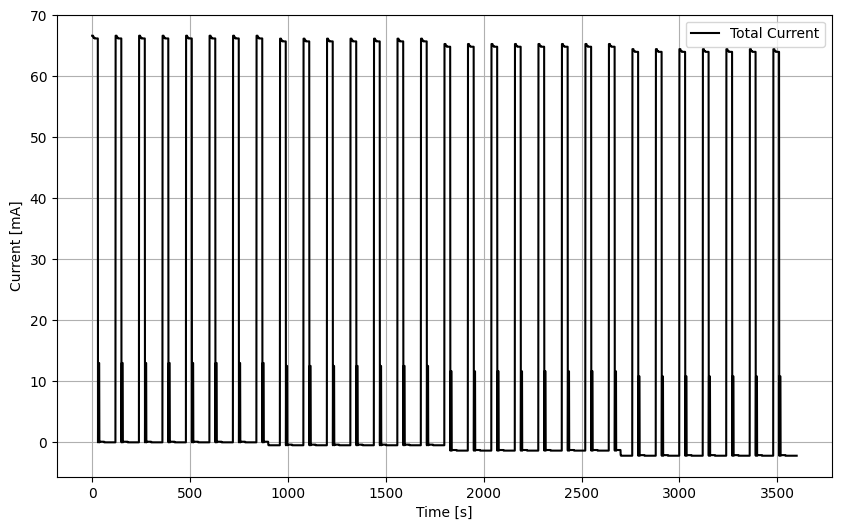

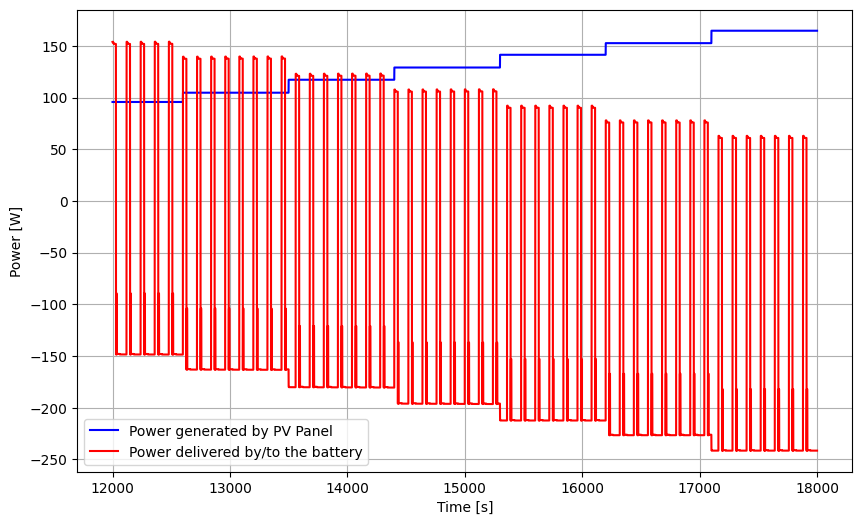

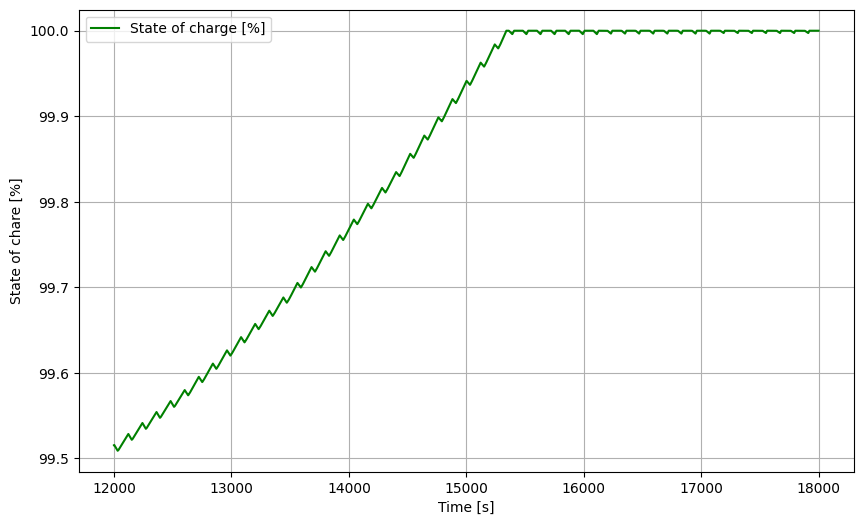

In [ ]:
# From the sim_trace.txt file obtained from the simulator, we can plot the information about the power over time:
import numpy as np
import matplotlib.pyplot as plt

header = ['time', 'soc', 'i_tot', 'i_mcu', 'i_rf', 'i_pv', 'v_pv', 'real_i_pv', 'i_batt', 'v_batt', 'i_air_quality_sensor', 'i_methane_sensor', 'i_temperature_sensor', 'i_mic_click_sensor']

header_dict = {index: value for index, value in enumerate(header)}
print(f"header indexes: {header_dict}")

# Read data from the file
data = np.loadtxt('sim_trace_2pv_parallel.txt', delimiter=' ', skiprows=1)    # Sequential execution, custom scheduling

# Save data in different arrays based on the header variable
time = data[:, header.index('time')]
soc = data[:, header.index('soc')]
i_tot = data[:, header.index('i_tot')]
i_mcu = data[:, header.index('i_mcu')]
i_rf = data[:, header.index('i_rf')]
i_pv = data[:, header.index('i_pv')]
v_pv = data[:, header.index('v_pv')]
real_i_pv = data[:, header.index('real_i_pv')]
i_batt = data[:, header.index('i_batt')]
v_batt = data[:, header.index('v_batt')]
i_air_quality_sensor = data[:, header.index('i_air_quality_sensor')]
i_methane_sensor = data[:, header.index('i_methane_sensor')]
i_temperature_sensor = data[:, header.index('i_temperature_sensor')]
i_mic_click_sensor = data[:, header.index('i_mic_click_sensor')]


P_mcu = 3.3 * i_mcu   # The power used by the MCU [W]
P_rf = 3.3 * i_rf   # The power used by the RF module [W]
P_temperature_sensor = 3.3 * i_temperature_sensor   # The power used by the temperature sensor [W]
P_air_quality_sensor = 3.3 * i_air_quality_sensor   # The power used by the air quality sensor [W]
P_methane_sensor = 3.3 * i_methane_sensor   # The power used by the methane sensor [W]
P_mic_click_sensor = 3.3 * i_mic_click_sensor   # The power used by the mic click sensor [W]

# Total power consumed by loads:
P_total = P_mcu + P_rf + P_temperature_sensor + P_air_quality_sensor + P_methane_sensor + P_mic_click_sensor
print(f"Total power consumed by loads: {P_total}")

# The power generated by the PV panel is
P_pv = v_pv * real_i_pv

P_batt = v_batt * i_tot

T = 120 # seconds
# Plot the total current requested or generated by the battery over time
plt.figure(figsize=(10, 6))
plt.plot(time[:30*T], i_tot[:30*T], label='Total Current', color='black') # Plot only the first T = 120 seconds

plt.xlabel('Time [s]')
plt.ylabel('Current [mA]')
plt.legend() 
plt.grid(True)
plt.show()


# Plot the power used by sensors over time
plt.figure(figsize=(10, 6))

start_T = T * 100
end_T = T * 150
plt.plot(time[start_T:end_T], P_pv[start_T:end_T], label='Power generated by PV Panel', color='blue')
# plt.plot(time[start_T:], P_pv[start_T:], label='Power generated by PV Panel', color='blue')
plt.plot(time[start_T:end_T], P_batt[start_T:end_T], label='Power delivered by/to the battery', color='red')
# plt.plot(time[start_T:], P_batt[start_T:], label='Power delivered by/to the battery', color='red')


plt.xlabel('Time [s]')
plt.ylabel('Power [W]')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
# Normalize the state of charge to a percentage scale
soc_percentage = soc * 100
plt.plot(time[start_T:end_T], soc_percentage[start_T:end_T], label='State of charge [%]', color='green')
plt.xlabel('Time [s]')
plt.ylabel('State of chare [%]')
plt.legend()
plt.grid(True)
plt.show()
